## Import Data

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load csv files
csv = "housing.csv"
housing_data = pd.read_csv(csv)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Understanding the dataset

In [3]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#identified NaN values in the total bedrooms data set
housing_data[housing_data['total_bedrooms'].isna()].head()

housing_data.dropna(inplace=True)

In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


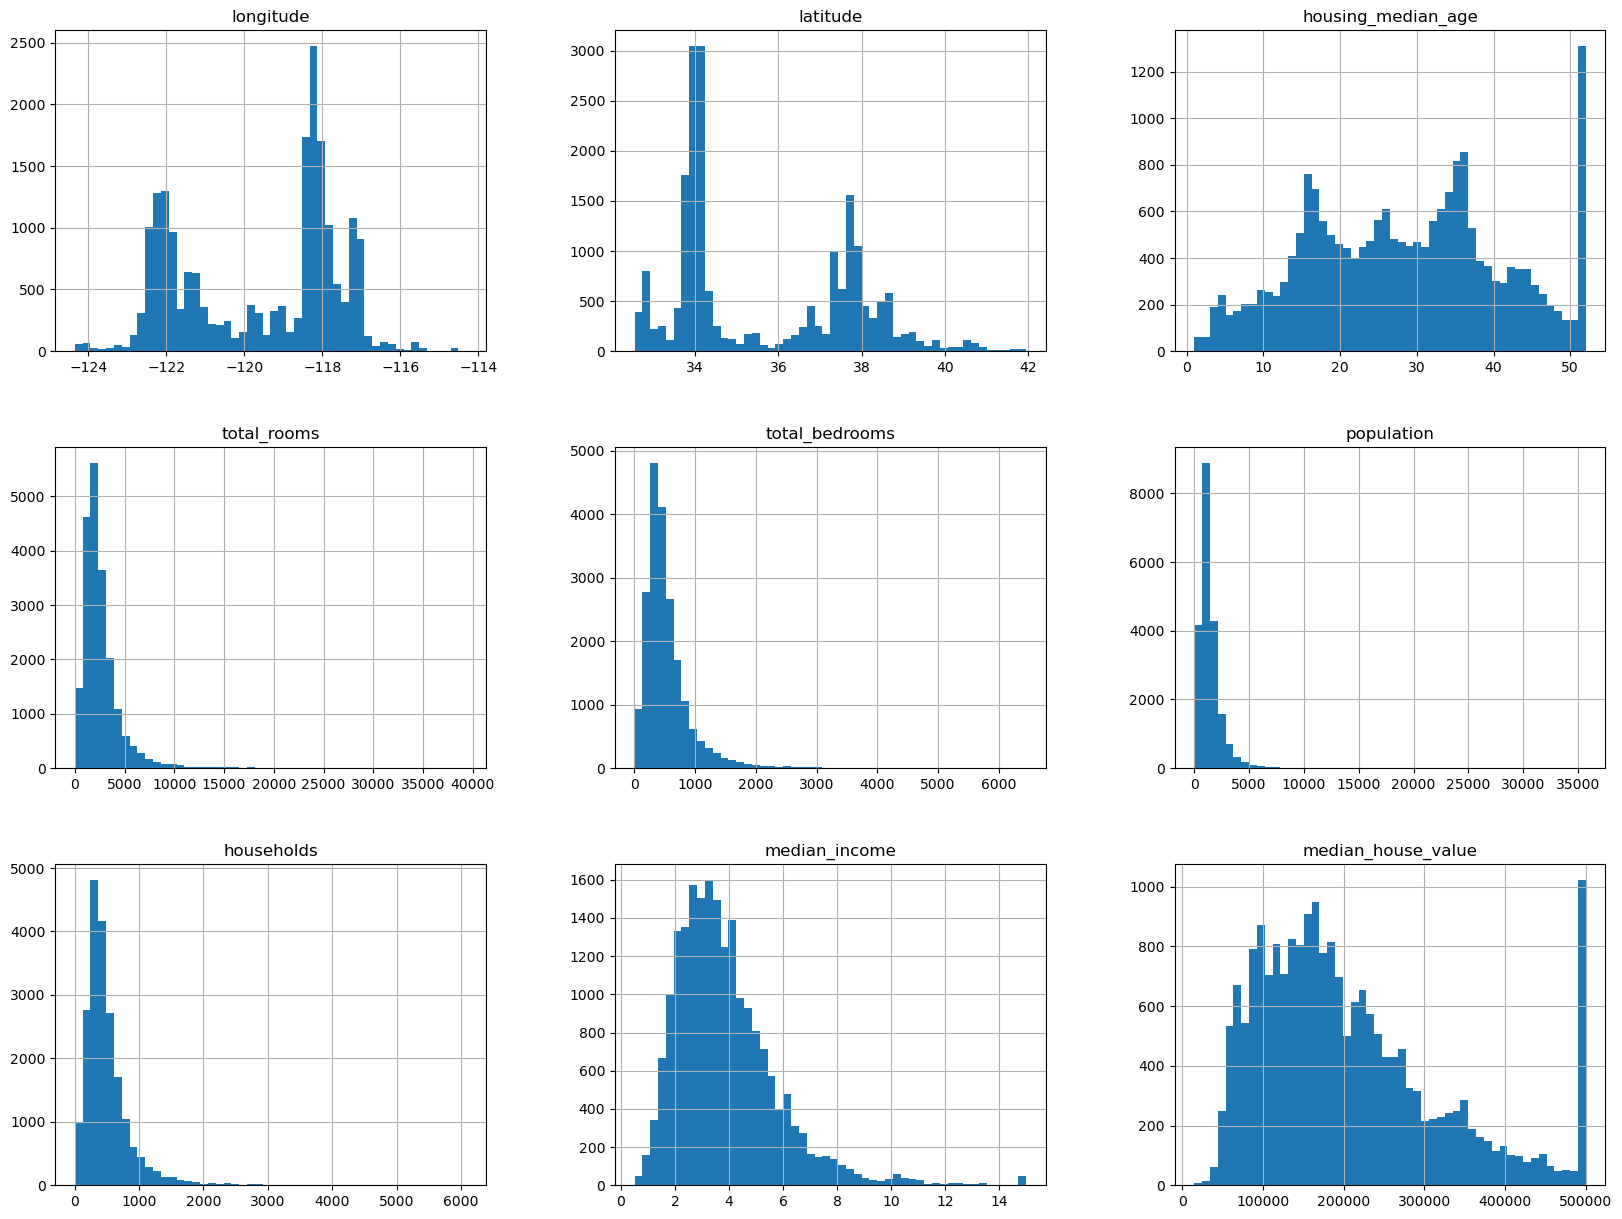

In [7]:
#plot a histogram for the different columns
housing_data.hist(bins =50, figsize = (20,15))
plt.show()

Many columns in this dataset are skewed. Using the standard scaler to scale the data about the mean will remove this feature. The median house value column has prices above 500,000 truncated to become 500,000, this will affect the model, it should be removed.

In [8]:
housing_data = housing_data[housing_data['median_house_value'] <= 500000].copy()
housing_data = housing_data[housing_data['housing_median_age'] < 52].reset_index(drop = True).copy()

In [9]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18374,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
18375,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
18376,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
18377,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Split the data into test-train split

<Axes: >

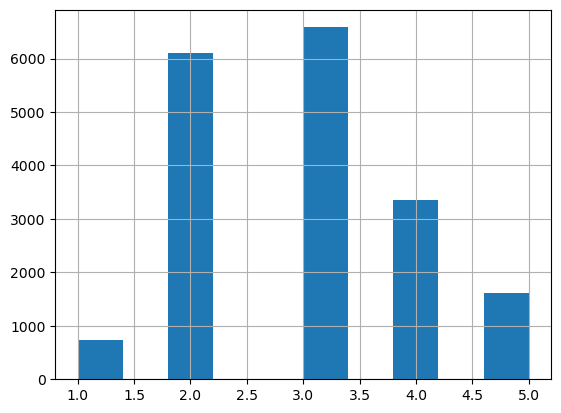

In [10]:
#identify the the vital column with equal ratio
housing_data['income_category'] = pd.cut(housing_data['median_income'], 
                                 bins = [0.,1.5, 3.0, 4.5, 6.0, np.inf],
                                 labels = [1,2,3,4,5])
housing_data['income_category'].hist()
#the data will be split attempting to maintain the ratio across the income_category

In [11]:
#Stratified Sampling
#now to perform some stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_category"]):
    train_set = housing_data.loc[train_index] #train set 80%
    test_set = housing_data.loc[test_index] #test set 20%

## Feature Engineering

In [12]:
train_set.drop('ocean_proximity', axis = 1).corr()['median_house_value'].sort_values(ascending = True)

latitude             -0.174418
longitude            -0.019881
housing_median_age    0.012506
population            0.018926
total_bedrooms        0.081722
households            0.100259
total_rooms           0.155461
income_category       0.628912
median_income         0.662379
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [13]:
def feature_engineering(data):
    data = data.copy()
    data["rooms_per_household"] = data["total_rooms"]/data["households"]
    data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
    data["population_per_household"]=data["population"]/data["households"]
    data = data.dropna()
    return data

In [14]:
train_set = feature_engineering(train_set)

## Create Model Pipeline

In [15]:
#divide the train set into labels and features
housing_labels = train_set['median_house_value'].copy()
housing_feat = train_set.drop('median_house_value',axis = 1).copy()

In [16]:
housing_feat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category,rooms_per_household,bedrooms_per_room,population_per_household
15539,-121.89,37.32,34.0,1014.0,246.0,952.0,215.0,2.8864,<1H OCEAN,2,4.716279,0.242604,4.427907
3219,-118.53,34.23,32.0,4039.0,984.0,2675.0,941.0,3.0321,<1H OCEAN,3,4.292242,0.243625,2.842721
9287,-117.68,33.49,17.0,2232.0,372.0,1072.0,385.0,4.2450,<1H OCEAN,3,5.797403,0.166667,2.784416
10301,-118.07,33.80,34.0,3486.0,507.0,1311.0,503.0,7.1221,<1H OCEAN,5,6.930417,0.145439,2.606362
12857,-117.11,32.70,34.0,2028.0,522.0,1797.0,464.0,1.7402,NEAR OCEAN,2,4.370690,0.257396,3.872845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,-118.30,34.16,35.0,3213.0,874.0,2401.0,819.0,2.8342,<1H OCEAN,2,3.923077,0.272020,2.931624
16076,-122.04,37.34,19.0,3694.0,1036.0,2496.0,986.0,3.6991,<1H OCEAN,3,3.746450,0.280455,2.531440
2071,-119.28,37.11,34.0,1901.0,394.0,171.0,73.0,3.0729,INLAND,3,26.041096,0.207259,2.342466
11167,-121.48,38.57,47.0,2438.0,804.0,1148.0,747.0,1.4301,INLAND,1,3.263722,0.329779,1.536814


In [17]:
from sklearn.impute import SimpleImputer # to put impute median into the NaN values
from sklearn.preprocessing import StandardScaler # scales the columns about the mean
from sklearn.preprocessing import OneHotEncoder # converts the category into numerical values
from sklearn.pipeline import Pipeline # create pipeline and performs transformation on the entire dataset
from sklearn.compose import ColumnTransformer #performs transformation on specific columns

num_attribs = housing_feat.drop('ocean_proximity', axis = 1).columns #numerical atttributes
cat_attribs = ["ocean_proximity"] #categorical attributes

#create the pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")),
                         ('std_scaler', StandardScaler()),
                          ])

#apply the categorical transformer to cat_attribs
#apply the numeric_pipeline to num_attribs
pipeline = ColumnTransformer([
                     ("cat", OneHotEncoder(), cat_attribs),
                     ("num", num_pipeline, num_attribs),
                     ])

In [18]:
#fit and transform this pipeline to the housing features
housing_feat = pipeline.fit_transform(housing_feat)

## Selecting an appropriate model

### Linear Regression 

In [19]:
#perform a cross validation for linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()
scores = cross_val_score(linear_reg, housing_feat, housing_labels, 
                        scoring = "neg_mean_squared_error", cv = 10)
linear_rsme_scores = np.sqrt(-scores)

In [20]:
print(linear_rsme_scores)
print('Mean Error:', linear_rsme_scores.mean()) #print root mean square errors from the prices 
print('Standard Deviation:', linear_rsme_scores.std())

[5.64068884e+04 6.15261666e+04 5.91144758e+04 3.61359168e+15
 6.33360278e+04 5.83443191e+04 5.87253157e+04 5.40419144e+04
 5.86149854e+04 5.81050892e+04]
Mean Error: 361359168510733.4
Standard Deviation: 1084077505356128.2


We obtained root mean square errors that are totally outrageous. This is due to the presence of outliers in the dataset. The RSME metric makes the presence of these outliers more pronounced.

### Decision Tree Regressor

In [21]:
#perform a cross validation for decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, housing_feat, housing_labels, 
                        scoring = "neg_mean_squared_error", cv = 10)
tree_rsme_scores = np.sqrt(-scores)

In [22]:
print(tree_rsme_scores)
print(tree_rsme_scores.mean()) #print root mean square errors from the prices 
print(tree_rsme_scores.std())

[62396.75491396 65789.93629119 62775.45596964 61318.77818274
 64061.9380347  63973.38351827 65591.86954449 60609.7779824
 65063.35542414 63388.64527283]
63496.9895134361
1657.3837167410165


Decision Tree returns a large RSME output averaging 63,000+. This can definitely be improved.

### Random Forest Generator

In [23]:
#perform simple random forest regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#some_feat
some_feat = housing_feat[:3001]
some_labels = housing_labels[:3001]

some_test = housing_feat[3001:4001]
some_test_label = housing_labels[3001:4001]

forest_reg = RandomForestRegressor()
forest_reg.fit(some_feat, some_labels)
some_pred = forest_reg.predict(some_test)
                               
forest_mse = mean_squared_error(some_test_label, some_pred)
forest_rsme = np.sqrt(forest_mse)
forest_rsme

50625.96732747928

This model performs about 21% better than the other model. Hyperparameter tuning would probably improve results.

In [24]:
#perform a cross validation for random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg2 = RandomForestRegressor() 
scores = cross_val_score(forest_reg2, housing_feat, housing_labels, 
                        scoring = "neg_mean_squared_error",cv = 4)
forest_rsme_scores = np.sqrt(-scores)

In [25]:
print(forest_rsme_scores)
print(forest_rsme_scores.mean()) #print root mean square errors from the prices 
print(forest_rsme_scores.std())

[46082.36141376 45457.16238919 44442.94167137 45088.0333564 ]
45267.624707680094
594.1539356069961


## Grid Search Cross Validation

### Grid Search Cross Validation for Random Forest 

Grid Search will allow me compare different values for different parameters in the data

In [26]:
#Using Grid Search CV for random forests again
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 90, 100], 'max_features': [1, 8, 17]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=4,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(housing_feat, housing_labels)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [1, 8, 17],
                          'n_estimators': [30, 90, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [28]:
#cross validation scores 
gridcvres = grid_search.cv_results_
for mean_score, params in zip(gridcvres['mean_test_score'], gridcvres['params']):
    print(np.sqrt(-mean_score),params)

49729.424193892155 {'max_features': 1, 'n_estimators': 30}
48764.101734367294 {'max_features': 1, 'n_estimators': 90}
48787.3728154768 {'max_features': 1, 'n_estimators': 100}
45690.82479775161 {'max_features': 8, 'n_estimators': 30}
45176.68863246965 {'max_features': 8, 'n_estimators': 90}
45104.955755057694 {'max_features': 8, 'n_estimators': 100}
46019.619306707515 {'max_features': 17, 'n_estimators': 30}
45299.58556061037 {'max_features': 17, 'n_estimators': 90}
45356.892005975606 {'max_features': 17, 'n_estimators': 100}


the best parameter arrangement is max_features = 8 and n_estimators = 90. I am going to save it and use it in for the test_set

In [29]:
final_model = grid_search.best_estimator_

In [33]:
import joblib
joblib.dump(final_model,"housing_model.pkl")

['housing_model.pkl']

In [31]:
#divide the train set into labels and features
housing_test_labels = test_set.dropna()['median_house_value'].copy()
housing_test_feat = feature_engineering(test_set.dropna().drop('median_house_value',axis = 1).copy())

#Pipeline
housing_test_pr = pipeline.transform(housing_test_feat)

final_predictions = final_model.predict(housing_test_pr)
final_mse = mean_squared_error(housing_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [32]:
final_rmse

44018.763380431694